# DS 200 Introduction to Data Science Lab 2
# Structured Data: Cleaning and Queries
# Instructor: John Yen
# TA: Rupesh Prajapati
# LA: Nathan Joel Tack

## Acknowledgement: 
This lab has been adopted from a lab previously developed at UC Berkeley (for the data 8 course).

## Learning Objectives of Lab 2
- Be able to understand the role of ID in representing structured data
- Be able to select rows from a table (Selection)
- Be able to select columns from a table (Projection)
- Be able to group a table by a column (Group By)
- Be able to combine multiple tables using Join (Join)
- Be able to understand the importance of Data Quality and the need of Data Cleaning
- Be able to display Bar Charts using Table

# Total points: 55 
- Exercise 1: 5 points
- Exercise 2: 5 points
- Exercise 3: 5 points
- Exercise 4: 5 points
- Exercise 5: 5 points
- Exercise 6: 10 points
- Exercise 7: 10 points
- Exercise 8: 10 points

# Due: 5 pm, September 7

# Part A Install and Import Datascience Module

Like Lab 1, the first thing we need to do is to install the datascience module, which was also developed at UC Berkeley for the data 8 course.

- A module is a collection of Python code that, together, forms a code library that can be directly used by Python developer.
- Google Colab already has several modules installed.  For example, we will later use sklearn module to create decision tree models from a set of labelled data.  
- Because the datascience module is not pre-installed in Google Colab,  we need to use the following command to install it in the beginning of every Colab notebook that needs to use it.
- Complete "!pip install datascience" in the line below.  Then click the ">" button (to the left of the code cell). 

In [1]:
!pip install datascience

     |████████████████████████████████| 71kB 2.3MB/s 
  Created wheel for folium: filename=folium-0.2.1-cp36-none-any.whl size=79980 sha256=8a3ce449037645af2c7efd8057012414e102602dc485eabf0c5652404004b562
  Stored in directory: /root/.cache/pip/wheels/b8/09/f0/52d2ef419c2aaf4fb149f92a33e0008bdce7ae816f0dd8f0c5
Successfully built folium
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


## Like Lab 1, we need to import datascience module before we can use functions/methods (codes) defined in the module later in the lab.

### For Example, one of the feature of datascience module is to enable us to easily post a query to a tabular data, and visualize data in the table in multiple ways (e.g., bar chart, scatter plot, etc).

In [2]:
from datascience import *

/usr/local/lib/python3.6/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)



 Like Lab 1, we will use a the Table class of datascience module to read a CSV file that contains salary data of employees of San Francisco City.
### Source of The Data: Kaggle https://www.kaggle.com/kaggle/sf-salaries

A table can be used to store structured data, where each row contains one "entity" (e.g., one transaction,
one employee, one patient, etc) to be stored.  The columns of the Table represents an attribute of the "entity"
(e.g., the amount of a transaction, the vendor of the transaction, etc). 

### Learning Tips: 
- In relational database management systems (RDMS), a "relation" corresponds to the "table" here, even though Table in Datascience module is not a RDMS.  RDMS and associated queries are topics covered in DS 220.

Like Lab 1, we use Table.read_table to read a CSV file called "SFSalaries2011_2014.csv".
- Note 1: We use a pair of double quotes "....." to indicate a string in Python.  Otherwise, Python may interpret it as a variable name (like salaries).
- Note 2: Table.read_table is like a function.  It takes a file name as input, and returns a Table object as its output.
- Note 3: We can use assignment (=) in Python to assign the output of the function Table.read_table to a variable (like salaries)
- Note 4: Running a line that contains only a variable results in displaying the content of the variable.

## Read Data from a file in your Google Doc

- Execute the following code cell, which lets this notebook know how to access your Google Drive (linked to your PSU account for accessing G suite, which includes Colab).
- Follow the instruction to go to the designated URL to find the "authorization code", then enter the authorization code in the field reserved for it.
- When you see "Mounted at /content/drive", that means your Google Drive is accessible from your python code in this Notebook.
 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
!ls /content/drive/My\ Drive/DS200Labs/

IMDB5000movies.csv  SFSalaries2011_2014.csv


In [4]:
path="/content/drive/My Drive/DS200Labs/SFSalaries2011_2014.csv"
Salaries = Table.read_table(path)
Salaries.show(5)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,nan,567595,567595,2011,nan,San Francisco,nan
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,nan,538909,538909,2011,nan,San Francisco,nan
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,nan,335280,335280,2011,nan,San Francisco,nan
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,nan,332344,332344,2011,nan,San Francisco,nan
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,nan,326373,326373,2011,nan,San Francisco,nan


# Part A Selecting Rows (Selection)
## Often, the question we would like to ask to a dataset is about a subset of the dataset.
## For example, 
- What is the average salary of 2011? 
- How has the average salary change over years?

## Learning Tips:
- Database introduces SQL query language, which enables efficient processing of these types of SELECTION QUERY to a large data base. 
- In the datascience Python module, the Table object has a simplified way of selecting rows from a Table:
```
    Table.where( "?column name", are.above(x))
```
selects all rows whose specified column is greater than the threshold provided (i.e., > x).
- For example, if we want select all employees whose salaries are greater than 100000, we can do this as follows:

In [5]:
High_Salaries = Salaries.where(TotalPay, are.above(100000))    
High_Salaries.show(5)

NameError: ignored

In [ ]:
type(Salaries.column("OtherPay")[0])

numpy.str_

### Learning Tips: 
- What is the type of column name in .where selection above? Try to replace it with TotalPay (without double quotes), what happens?
- What is the type of the values in the TotalPay column? what happens if you replace 100000 with a string "100000" (make sure the column name in the first parameter is the string "TotalPay")?

### Summary of Data Types

For your later reference, here are the principal types of data we'll work with in this course.

|English name|Python name|Example|Example Python expressions|
|-|-|-|-|
|Number|`float` (numbers with decimals) or `int` (integers)|The number of words in a book|`2`, `.25`, `2+2`|
|Text|`string`|A word, chapter, or whole text of a book|`"I <3 Data Science"`|
|A collection of multiple kinds of data|`table`|The letter grades and all the project, midterm, and final exam scores in a class|`Table.read_table("data/imdb_ratings.csv")`|


# Structured vs Ill-Structured Data
Text in tweets is an example of ill-structured data, because it contains meaning that needs to be inferred.  The problem of inferring the meaning of text is often referred to as "Natural Language Understanding", or NLP for short.  We will talk more about computational representation of text in week 3.

A table whose columns are either number or pre-defined words (suche as the name of job titles) stores structured data.  

## Unique ID and Structured Data
Another important characteristic of structured data representation is the use of a **unique ID** to indicate which entities in the real world is associated with data in a row of the table.  Without such unique IDs, for example, employees with identical name can not be distinguished, two products of the same type (e.g., grapes from two different farms) can not be distinguished.  These uniqe IDs can be printed on the packages of products (e.g., as bar code). By scanning these bar codes at the check out counter, the store can keep track of which product was sold. Furthermore, by combining the product ID with other information associated with a customer's purchase (time of purchase, date of purchase, credit card used, etc).  

### Structured Data for Representing Events

All the data associated with a purchasing event (also called a transaction) can be stored together so that the data can be used for answering questions such
- What products have become more popular in recent days? (Help to plan how many of the products should be in stock?)
- What products people tend to purchse together? (Help with product placement and marketing.)

In a similar way, structured data can also be used to represent products in stock.  This type of data (often referred as inventory data) can help to answer questions such:
- What products have been out of stock? How long have they been out of stock?
- What neighboring stores has a specific car that this customer what to buy?


# Selection using =

To select rows whose value for a specifc column is equal to a string, we can use the following
```
Table.where("column name", are.equal_to("a string")
```
For example, the following selects all salary entries for a given name.

In [ ]:
ABF_Salaries=Salaries.where("EmployeeName", are.equal_to("A Bernard Fatooh"))
ABF_Salaries

Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
66372,A Bernard Fatooh,Sheriff's Property Keeper,18472.35,0.0,27.84,5014.66,18500.2,23514.8,2012,nan,San Francisco,nan
140526,A Bernard Fatooh,Sheriff's Property Keeper,24061.35,0.00,0.00,6091.68,24061.3,30153,2014,nan,San Francisco,PT


# Exercise 1 ID of Structured Data (5 points)

Does the "Id" column serves as a unique ID of an employee for the SF city employees?  Describe the rationale of your answer using the next text cell.

# Ans to Exercise 1: 
No, because the ID may be different for the same employee. One person may have mutiple records based on different fomatting. 


In [ ]:
Name_Salaries=Salaries.group("EmployeeName")
Name_Salaries.show(20)

EmployeeName,count
A BERNARD FATOOH,1
A Bernard Fatooh,1
A Bernard Fatooh,2
A ELIZABETH MARCHASIN,1
A JAMIL NIAZI,1
A K Finizio,1
A. JAMES ROBERTSON II,1
A. James Robertson Ii,1
A. James Robertson Ii,1
A.K. Finizio,1


## Selection using <
### Similarly, we can use Table.where("column name", are.below(y)) to select all the rows (employees in this case) whose value for the column is less than y.

In [ ]:
Low_Salaries = Salaries.where("TotalPay", are.below(25000))    
Low_Salaries.show(5)

Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
28644,ALLISON CARROLL,REGISTERED NURSE,20263.51,800.89,3920.46,nan,24984.9,24984.9,2011,nan,San Francisco,nan
28645,BRIAN SNEATHEN,SIGN WORKER,24654.88,269.72,54.69,nan,24979.3,24979.3,2011,nan,San Francisco,nan
28646,WINSTON LOUIE,"COUNSELOR, LOG CABIN RANCH",20732.86,3614.02,630.66,nan,24977.5,24977.5,2011,nan,San Francisco,nan
28647,LYNNETTE LEIGHTON,PHYSICIAN SPECIALIST,24963.61,0.0,0.0,nan,24963.6,24963.6,2011,nan,San Francisco,nan
28648,WOLF THURMEIER,CUSTOMER SERVICE AGENT TRAINEE,23909.95,0.0,1044.42,nan,24954.4,24954.4,2011,nan,San Francisco,nan


#Selection on Multiple Conditions
## Often, we would like to select all rows from a table that satisfy multiple conditions.  To achieve this, we can combine multiple .where (selection) into a sequence (i.e., adding a .where(...) to the end of another .where(...)).   The result is all rows that satisfy all of the conditions specified.  

## Exercise 2 Selection Query (5 points)

Find all of employee entries with TotalPay between \$25,000 and \$75,000.  This is the range of one definition for middle class household income. Multiple .where (selection) can be combined in a sequence (i.e., adding a .where(...) to the end of another .where(...)).   The result is all rows that satisfy all of the conditions specified.  

In [ ]:
Middle_Class_Salaries= Salaries.where("TotalPay", are.above(25000)).where("TotalPay", are.below(75000))
Middle_Class_Salaries.show(5)

Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
15785,MAMIKO NAKAMURA,LIBRARIAN I,72464.94,0.0,2534.68,nan,74999.6,74999.6,2011,nan,San Francisco,nan
15786,HEDLEY PRINCE,WHARFINGER II,72681.97,748.05,1568.71,nan,74998.7,74998.7,2011,nan,San Francisco,nan
15787,LINDA BARNARD,RECREATION SUPERVISOR,74268.25,0.0,730.05,nan,74998.3,74998.3,2011,nan,San Francisco,nan
15788,ANGELA WHITTAKER,ADMINISTRATIVE ANALYST,74997.84,0.0,0.0,nan,74997.8,74997.8,2011,nan,San Francisco,nan
15789,JANE CHU,ADMINISTRATIVE ANALYST,74997.81,0.0,0.0,nan,74997.8,74997.8,2011,nan,San Francisco,nan


# Part B Selecting Columns (Projection)

Another kinds of questions we often want to ask a datbase/table is to extract all values of a specific column.
## For example:
- What are all of the job titles in 2011?
- What are all of the job titles of Penn State alumni from class of 2016?

## Learning Tips:
- In SQL language and relational database management, selecting columns is referred to as "Projection".
- The Table class in DataScience module provides a simpler way to extract columns called "select":

```
Table.select("column name 1", "column name 2", ...) 
```
returns a new table that contain ONLY those columns specified.

## Example using Table:
The following code select three columns from the SF city employees salary table: Job Title, Total Pay, and Year. 

In [ ]:
Job_TotalPay = Salaries.select("JobTitle","TotalPay","Year")
Job_TotalPay.show(5)

JobTitle,TotalPay,Year
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595,2011
CAPTAIN III (POLICE DEPARTMENT),538909,2011
CAPTAIN III (POLICE DEPARTMENT),335280,2011
WIRE ROPE CABLE MAINTENANCE MECHANIC,332344,2011
"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",326373,2011


# Exercise 3 Selection (5 points)

Complete the following code cells to create two tables of SF city employees salary: one for year 2011, the other for year 2014.  

In [ ]:
Job_TotalPay_2011 = Job_TotalPay.where(  "Year" , are.equal_to(2011) )
Job_TotalPay_2011.show(10)
Job_TotalPay_2014 = Job_TotalPay.where( "Year" , are.equal_to(2014) )
Job_TotalPay_2014.show(10)

JobTitle,TotalPay,Year
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595,2011
CAPTAIN III (POLICE DEPARTMENT),538909,2011
CAPTAIN III (POLICE DEPARTMENT),335280,2011
WIRE ROPE CABLE MAINTENANCE MECHANIC,332344,2011
"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",326373,2011
ASSISTANT DEPUTY CHIEF II,316286,2011
"BATTALION CHIEF, (FIRE DEPARTMENT)",315981,2011
DEPUTY DIRECTOR OF INVESTMENTS,307899,2011
"BATTALION CHIEF, (FIRE DEPARTMENT)",303428,2011
"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",302378,2011


JobTitle,TotalPay,Year
Deputy Chief 3,471953,2014
Asst Med Examiner,390112,2014
Chief Investment Officer,339654,2014
Chief of Police,326717,2014
"Chief, Fire Department",326233,2014
Asst Med Examiner,344187,2014
Dept Head V,311299,2014
Executive Contract Employee,310161,2014
"Battalion Chief, Fire Suppress",335485,2014
Asst Chf of Dept (Fire Dept),329391,2014


# Data Quality

A major task in early phases of any Data Science project is to ensure the quality of the data is good, so that predictive models or other data analytics results can build on this good foundation.  Below are some issues that can have negative impacts on the quality of data:
- Missing Data: The electronic medical record of a patient may not contain the same set of test results for each visit, because the physician may not order the same set of tests for all visits.  As a result, the longitudinal data of a patient may have missing values for the tests that the physician does not order for the patient.

- Inconsistent Data: One common problem in integrating data from multiple sources is that different data sources may have chosen different format or different names for the same data.  For example, date may be coded as as a string in the format of day/month/year in one data source, but coded as three separate columns: day, month, year.  Such inconsistent data format or representation needs to be mapped to a common format and representation before it can be analyzed.

The process to pre-process data to address these issues is often referred to as **data cleaning**. You will learn about techniques for data cleaning in **DS 310** and **DS 330**.

# Exercise 4 Data Quality (5 points)

Compare the Job Titles of 2011 and 2014. (1) Discuss issues regarding data quality of the SF city employees dataset. (2) Briefly describe a data cleaning approach to improve the quality of the data.

## Answer to Exercise 4: Type your answer to Exercise 4 here.


(1) Job Titiles in 2011 is all in upper case, and 2014 table just capitalized first letter. Two tables have different job titles format which will create multiple records.
(2) Change 2014 job titles to upper case, or change 2011 job titles to 2014 format, make two tables have the same job titles format.

# Basic Statistics Summary of Data

It is often useful to have a basic understanding about the data before further data analytics or predictive modeling.  One important type of understanding is statistics summary of the values in each column.  
- What is the range of values in a column (e.g., TotalPay)?
- What is the medium value of a column (e.g., TotalPay)?
- Do these characteristics change over time?

Table in datascience module provide a simple way to generate statistic summary of a table: 
```
Table.stats()
```
For columns that contain numeric values, the statistic summary includes median and sum.

In [ ]:
Job_TotalPay_2011.stats()

statistic,JobTitle,TotalPay,Year
min,ACCOUNT CLERK,0,2011
max,ZOO CURATOR,567595,2011
median,,68213.2,2011
sum,,2.5942e+09,7.27157e+07


In [ ]:
Job_TotalPay_2014.stats()

statistic,JobTitle,TotalPay,Year
min,"ACPO,JuvP, Juv Prob (SFERS)",-618.13,2014
max,Youth Comm Advisor,471953,2014
median,,72360,2014
sum,,2.87691e+09,7.67797e+07


# Exercise 5  (5 points)
Compare the median of 2011 total pay with that of 2014, what difference did you find? 

# Answer to Exercise 5:  
The median is increased, 2014 had a higher median than 2011.

# Part C Grouping Rows (GroupBy)

Some questions we are interesed in asking to a dataset/databse require rows of the table to be first GROUPED based on certain criteria.  

# Examples
- What job titles have the highest medium salary?
- What job titles have the highest number of employees?
- What job title has the highest growth (in terms of employees) from 2011 to 2014?
- What job title has the highest increase of total pay from 2011 to 2014?

# Learning Tips:
- SQL has a well-defined and a more flexible way to do grouping (i.e., GroupBy). The Table objects has a simple (and less powerful) grouping method:
- Table.group("column name") returns a new table that contains a "counter" column, whose value is the total count of rows (employees in this example) that have the same value for the specified column.

## Example of Table.group

The following code group the SF salaries by JobTitle, which returs a table with two columns: 
- JobTitle: All possible JobTitle in the dataset
- count: Total number of salary entries with the corresponding Job Title. 

In [ ]:
Job_counter_2011 = Job_TotalPay_2011.group("JobTitle")
Job_counter_2011.show(10)

JobTitle,count
ACCOUNT CLERK,83
ACCOUNTANT,5
ACCOUNTANT INTERN,48
ACUPUNCTURIST,1
ADMINISTRATIVE ANALYST,93
ADMINISTRATIVE ANALYST II,2
ADMINISTRATIVE ANALYST III,2
ADMINISTRATIVE ENGINEER,10
ADMINISTRATIVE SERVICES MANAGER,3
"ADMINISTRATOR, SFGH MEDICAL CENTER",1


In [ ]:
Job_counter_2014 = Job_TotalPay_2014.group("JobTitle")
Job_counter_2014.show(10)

JobTitle,count
"ACPO,JuvP, Juv Prob (SFERS)",1
ASR Senior Office Specialist,22
ASR-Office Assistant,15
Account Clerk,93
Accountant I,2
Accountant II,77
Accountant III,99
Accountant IV,62
Accountant Intern,11
Acupuncturist,1


# Part D <a name="visualizations"></a> Visualizations Using Bar Charts


Using tables, we can easily create different types of visualizations. This section will go over how to create bar charts. Bar charts allow us to visualize **categorical distribtions**. Before we get started, please run the cell below to import the necessary modules.

In [ ]:
# Run this cell, but please don't change it.

# These lines import the NumPy, datascience, and math modules.
import numpy as np
import math
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

### Visualize Query Results: It is often useful to be able to visualize the results of data analytics.  Bar Charts are one of the visualization techniques that are useful to 

#### Bar Chart: Table.barh("Column 1", "Column 2")
- Column 1: Different categories
- Column 2: Values associated with each category.

#### Visualization Problem: Visualize the number of entries with different job title
First, we need to see how many JobTitles are there so that we can trim down to visualize
only those that have significant number of entries. 
The easiest way to do this is
1. Sort the table by count.
2. Select the top k to visualize.

Below is an example to visualize the counter of Job Titles that have at least 1000 entries.

In [ ]:
Sorted_Job_counter_2011= Job_counter_2011.sort("count", descending=True)
Sorted_Job_counter_2011.show(10)

JobTitle,count
TRANSIT OPERATOR,2388
SPECIAL NURSE,1402
REGISTERED NURSE,1219
CUSTODIAN,796
FIREFIGHTER,794
POLICE OFFICER III,779
RECREATION LEADER,692
DEPUTY SHERIFF,685
MENTAL HEALTH REHABILITATION WORKER,559
PUBLIC SERVICE AIDE-SPECIAL PROGRAMS,531


In [ ]:
Sorted_Job_counter_2014 = Job_counter_2014.sort("count", descending=True)
Sorted_Job_counter_2014.show(10)

JobTitle,count
Transit Operator,2479
Special Nurse,1478
Registered Nurse,1234
Public Svc Aide-Public Works,916
Firefighter,815
Custodian,804
Police Officer 3,783
Recreation Leader,690
Patient Care Assistant,652
Deputy Sheriff,617


# Using Bar Charts 

Bar charts provide a simple way to visualize a distribution.  The Table object can use .barh to create a Bar Chart using value of the second parameter as the y axis, and the value of the first parameter as the x axis.

# Exercise 6A Visualize a Bar Chart (5 points)
Complete the following code to display a bar chart that shows the number of employees for each job title that exceeds 200 employee entries in the SF city salary dataset.  For this bar chart, the JobTitle serves as the X axis, while count serves as the Y axis.

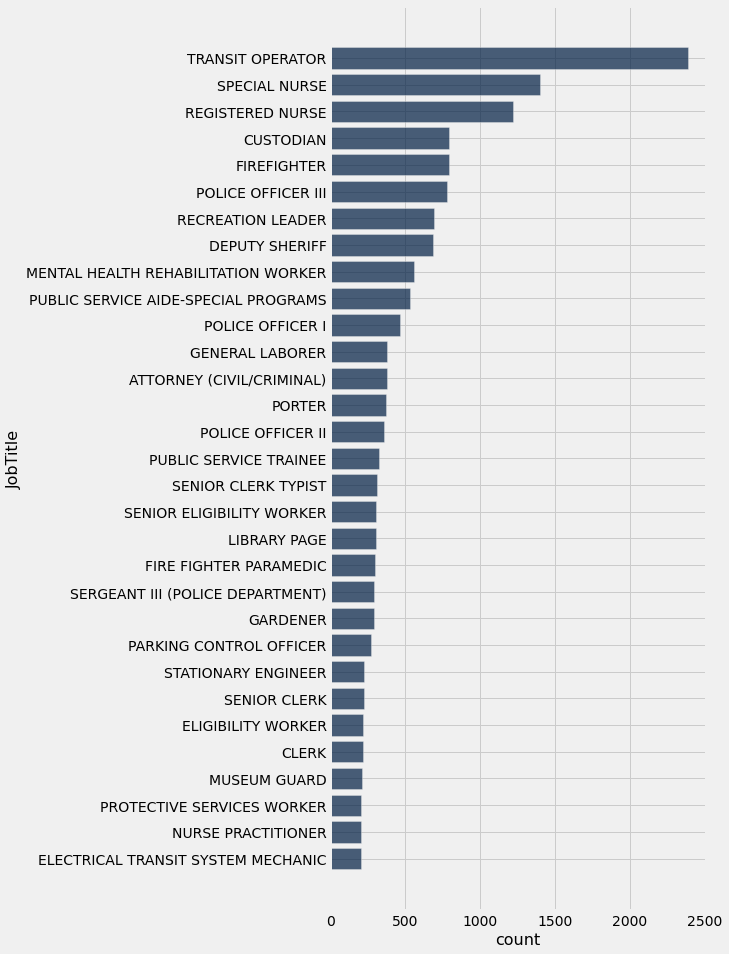

In [ ]:
Filtered_Sorted_Job_counter_2011 = Sorted_Job_counter_2011.where("count", are.above(200))
Filtered_Sorted_Job_counter_2011.barh("JobTitle","count")

# Exercise 6B (5 points)
Complete the following code cell to display the bar chart for the number of 2014 employees for each Job Title exceeding 200 employee entries in the SF salary dataset.

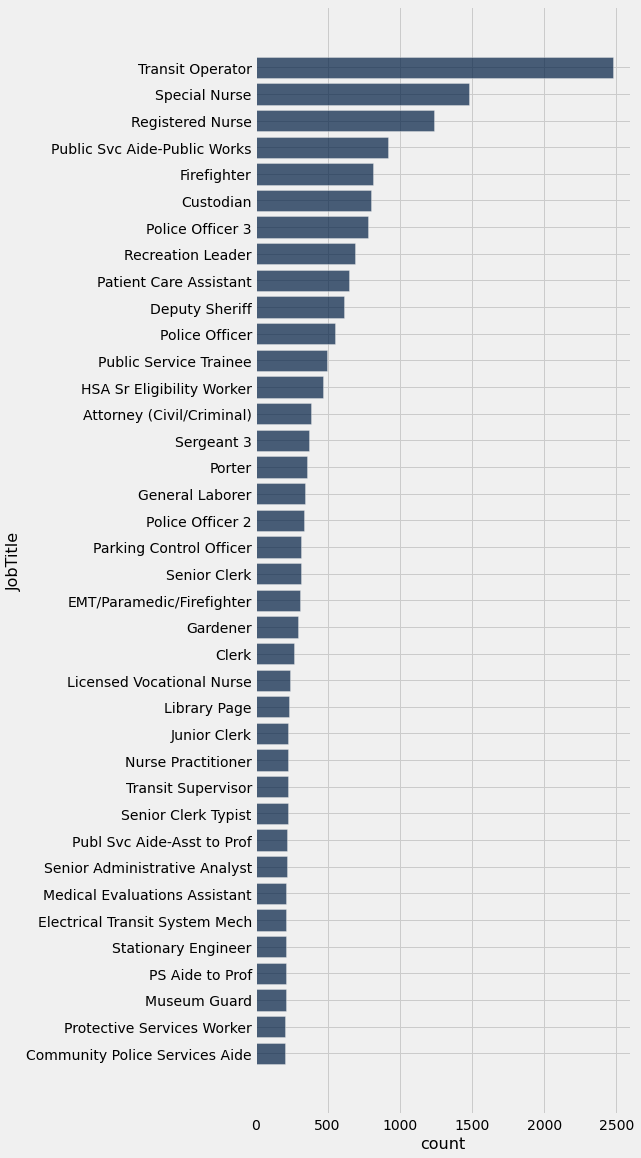

In [ ]:
Filtered_Sorted_Job_counter_2014 = Sorted_Job_counter_2014.where("count" , are.above(200))
Filtered_Sorted_Job_counter_2014.barh("JobTitle","count")

# Exercise 7: (10 points)
Identify the the 2011 top ten job titles in terms of number of employee entries associated with the job title, and compare it with those of year 2014.  
- (a) Did you find similarities between them? 
- (b) What differences did you find? 
- (c) What data cleaning is needed before we can automate such comparison? 
- (d) What data query technique in this Lab is useful to automate this comparison?

# Answer to Exercise 7 (10 points)
(a)Most of top 10 job titles were not changed, top 3 were stay the same, the numbers of each jobs of top 6 have increased, the last 4 have slightly decreased.

(b)"Public Svc Aide-Public Works" increased from 10th to 4th, almost increased half number of 2011. "Mental Health Rehabilitation Workers" is 9th in 2011, and "Patient Care Assistant" replaced it in 2014.

(c)Inconsistent Data. They need to change the job titles to the same formats.

(d)Using are.above to find the number of employees of each job titles which exceeds an amount, then using .barh to create a bar chart to visualize the distribution.

# Part D Join Queries and a Mini Problem

Suppose we want to compare average salaries of different job titles of SF city employees in 2011, one way to do this is the following:
1. Calculate the sum of TotalPay for all entries in each group having the same Job Title.
2. Join the table that counts Sum of TotalPay with the table that contains the counter for each Job Title
3. Calculate the Average TotalPay for each Job Title by applying a function to each row.
4. Add the Average TotalPay to the Joined Table
5. Sort the Average TotalPay of Job Title by the number of employees associated with each Job Title.
6. Use a threshold n to select Job Titles who are associated with at least n employees.
7. Visualize Average TotalPay for Job Title that has at least n entries.

### Calculate the Sum of TotalPay for Each Job Title
We calculate the sum of TotalPay for each Job Title in 2011 using `group` method in Table, and by specifying the value for the 'collect` parameter is sum (the default value of collect is count).


In [ ]:
# Step D.1
Job_TotalPay_2011_sum = Job_TotalPay_2011.group('JobTitle', collect=sum)
Job_TotalPay_2011_sum.show(5)

JobTitle,TotalPay sum,Year sum
ACCOUNT CLERK,3.65496e+06,166913
ACCOUNTANT,237146,10055
ACCOUNTANT INTERN,1.39352e+06,96528
ACUPUNCTURIST,67594.4,2011
ADMINISTRATIVE ANALYST,5.9478e+06,187023


### Noticice: The code above creates a new column called "TotalPay sum".
This is because the .group method can take a second parameter "collect=", which
specifies the way TotalPay in each Job Title is aggregated.  In our case, we want to add all
of the TotalPay for each Job Title, this is what "collect=sum" does.  The resulted sum for
each Job Title is a new column (named "TotalPay sum") in the new Table generated.

### Join Queries
The table above (Job_TotalPay_2011_sum) and the table Job_counter_2011 (created in Part C to record the total number of employees associated with each Job Title in 2011) have the same JobTitle column.  Therefore, we can join these two talbes into one table using the "join" operation.

### Learning Tip:
The size of the generated table is the same as the size of the two input tables in this case.  In general, however, this may not be the case.  For example, a table of credit card fraud (that contains websites for online credit card transactions) can be joined with a table of known compromised websites, which is likely to contain more entries than those involved in a credit card fraud table.

In [ ]:
# Step D.2
Job_TotalPay_2011_sum_count = Job_TotalPay_2011_sum.join('JobTitle', Job_counter_2011)
Job_TotalPay_2011_sum_count.show(5)

JobTitle,TotalPay sum,Year sum,count
ACCOUNT CLERK,3.65496e+06,166913,83
ACCOUNTANT,237146,10055,5
ACCOUNTANT INTERN,1.39352e+06,96528,48
ACUPUNCTURIST,67594.4,2011,1
ADMINISTRATIVE ANALYST,5.9478e+06,187023,93


# Lambda function

One way to calculate the average salary of each JobTitle is to apply a function that divide the "TotalPay sum" by "count". In math, we may describe such a function as
```
f(x,y) = x/y
```
In programming, we can describe such a function as a "lambda expression" as follows:
```
lambda x, y : x / y
```
A Table object can apply such function to two columns of the table, one as **dividend** (x), the other as **divisor** (y). 

The order of the parameters in the function determines that the first parameter is the dividend, and the second parameter is the divisor.  In math, we apply such a function to numbers:
```
f(40,8) = 5
```
When we apply a function to each rows of the table, we use the column name to indicate which column is the dividend, and which column is the divisor.
```
Table.apply(lambda x, y: x/y, "TotalPay sum", "count")
```
indiates each JobTitle's "TotalPay sum" is divided by "count", which computes the averge salary for each Job Title in 2011.

In [ ]:
# Step D.3
Job_AvgPay_2011 = Job_TotalPay_2011_sum_count.apply(lambda x, y: x/y, "TotalPay sum", "count")
Job_AvgPay_2011

array([44035.66433735, 47429.268     , 29031.74291667, ...,
       52705.88038462, 53632.87      , 66686.56      ])

# Adding a column to a Table

Often, intermediate data analytics results need to be saved so that they can be used for future data analytics step.  The Table object enables us to add a column using ".with_column" with two parameters:
- The first parameter is the name of the column to be added.
- The second parameter is the content of the new column to be added to the table.

For Example, the following code creates a new table adding an "Avg TotalPay" column to the Job_TotayPay_2011_sum_count table.

In [ ]:
# Step D.4
AvgSalaries_and_Titles_2011 = Job_TotalPay_2011_sum_count.with_column('Avg TotalPay', Job_AvgPay_2011)
AvgSalaries_and_Titles_2011.show(5)

JobTitle,TotalPay sum,Year sum,count,Avg TotalPay
ACCOUNT CLERK,3.65496e+06,166913,83,44035.7
ACCOUNTANT,237146,10055,5,47429.3
ACCOUNTANT INTERN,1.39352e+06,96528,48,29031.7
ACUPUNCTURIST,67594.4,2011,1,67594.4
ADMINISTRATIVE ANALYST,5.9478e+06,187023,93,63954.9


### How do we visualize average total pay by job title, since there are more than 1000 titles?
Suppose we are most interested in average total pay for job title with a significant number of employees. Therefore, we first sort them in the descending order of "count".


In [ ]:
# Step D.5
AvgSalaries_and_Titles_2011_s = AvgSalaries_and_Titles_2011.sort('count', descending=True)
AvgSalaries_and_Titles_2011_s.show(10)

JobTitle,TotalPay sum,Year sum,count,Avg TotalPay
TRANSIT OPERATOR,1.47441e+08,4802268,2388,61742.6
SPECIAL NURSE,4.39178e+07,2819422,1402,31325.1
REGISTERED NURSE,1.29971e+08,2451409,1219,106621
CUSTODIAN,3.22552e+07,1600756,796,40521.6
FIREFIGHTER,1.10598e+08,1596734,794,139292
POLICE OFFICER III,9.9583e+07,1566569,779,127834
RECREATION LEADER,4.1277e+06,1391612,692,5964.89
DEPUTY SHERIFF,6.49518e+07,1377535,685,94820.1
MENTAL HEALTH REHABILITATION WORKER,2.70119e+07,1124149,559,48321.8
PUBLIC SERVICE AIDE-SPECIAL PROGRAMS,3.26157e+06,1067841,531,6142.32


### How to select the job titles to visualize their salaries? 
Should we use a threshold of count (say 200) so that we focus on those job titles that have at least 200 rows (i.e., at least 200 entries with the job title)?  

To help us to make a decision, it may be useful to get some simple statistics (minimum value, maximum value, median value) for each column.

In [ ]:
AvgSalaries_and_Titles_2011_s.stats()

statistic,JobTitle,TotalPay sum,Year sum,count,Avg TotalPay
min,ACCOUNT CLERK,149.51,2011,1,149.51
max,ZOO CURATOR,1.47441e+08,4.80227e+06,2388,399211
median,,566616,16088,8,76958.1
sum,,2.5942e+09,7.27157e+07,36159,8.72571e+07


### Are you surprised about the midian of count so low (8), while the maximum is so high (2388)?  What does this mean?

# Exercise 8 Visualize Average Salaries of Large Employee Groups (10 points)

Complete the following cells to complete (A) D.6 and (B) D.7:
- A: Select a threshold for the size of employee groups considered "large".
- B: Generate a bar chart of the average salaries of job titles associated with a large number of employees. 


In [ ]:
# Step D.6 (also Exercise 8A)
AvgTotalPay_Large_Job_2011= AvgSalaries_and_Titles_2011_s.where("count", are.above(100))
AvgTotalPay_Large_Job_2011

JobTitle,TotalPay sum,Year sum,count,Avg TotalPay
TRANSIT OPERATOR,1.47441e+08,4802268,2388,61742.6
SPECIAL NURSE,4.39178e+07,2819422,1402,31325.1
REGISTERED NURSE,1.29971e+08,2451409,1219,106621
CUSTODIAN,3.22552e+07,1600756,796,40521.6
FIREFIGHTER,1.10598e+08,1596734,794,139292
POLICE OFFICER III,9.9583e+07,1566569,779,127834
RECREATION LEADER,4.1277e+06,1391612,692,5964.89
DEPUTY SHERIFF,6.49518e+07,1377535,685,94820.1
MENTAL HEALTH REHABILITATION WORKER,2.70119e+07,1124149,559,48321.8
PUBLIC SERVICE AIDE-SPECIAL PROGRAMS,3.26157e+06,1067841,531,6142.32


# Exercise 8B (5 points)
Complete the following code to visualize the Average Total Pay of 2011 Job Titles associated with a large number of employees.

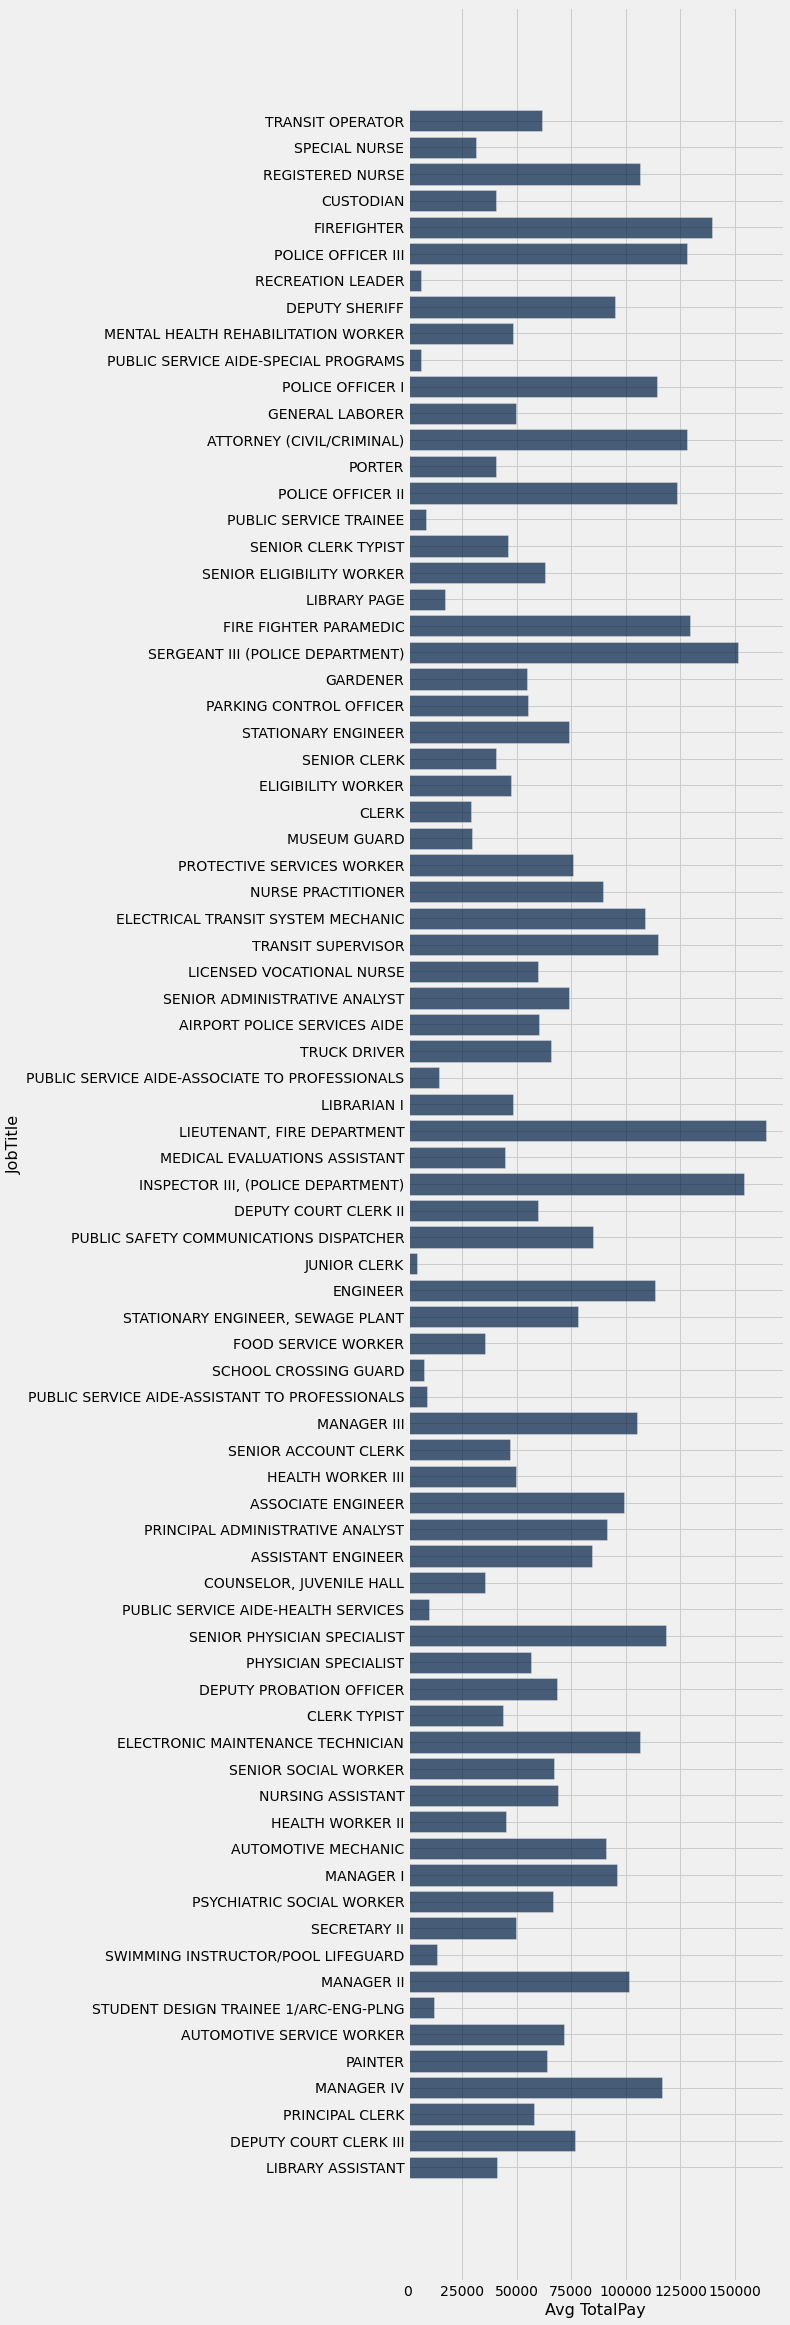

In [ ]:
# Step D.7 (also Exercise 8B)
AvgTotalPay_Large_Job_2011.barh("JobTitle", "Avg TotalPay")